In [1]:
%matplotlib inline
#load modules
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from astropy import units as u
from astropy.io import fits
from  matplotlib.colors import LogNorm
import scipy.ndimage

# MagAO-X function definitions
import magaoxFunctions as mf
# draw the dark hole regions
from skimage.draw import draw

# PSD code
from scipy import signal
import h5py
import copy
import PSD_defns as psd

In [2]:
# Test with the coastline flat
ntot_cf = 1 # goes from 1-8
D_full_cf = 50*u.mm
ca_80 = 80
dr_width = 5
npix_diam_cf = []
var_cf = []
for ntest in range(0,ntot_cf):
    # open the optic surface
    surf_loc = 'zygo_data/flat_mirrors/coastline_flat_correct.fits'
    
    # pass in the data for generating PSD content
    (kval, mean_val, npix_diam, ap_var) = psd.calc_PSD(surf_loc, D_full_cf, ca_80, dr_width)
    
    print('Finished calculating PSD for surface {}'.format(ntest))
    # if this is the first loop, initialize variables.
    # There's gotta be a smarter way to do this.
    if ntest == 0:
        kval_cf = np.zeros((ntot_cf, np.shape(kval)[0]))
        mean_psd_cf = np.zeros((ntot_cf, np.shape(mean_val)[0]))
    
    kval_cf[ntest,:] = copy.copy(kval)
    mean_psd_cf[ntest,:] = copy.copy(mean_val)
    npix_diam_cf.append(npix_diam)
    var_cf.append(ap_var)

Finished calculating PSD for surface 0


Text(0, 0.5, 'Surface PSD [nm$^{2}$ mm$^{2}$] (variance normalized)')

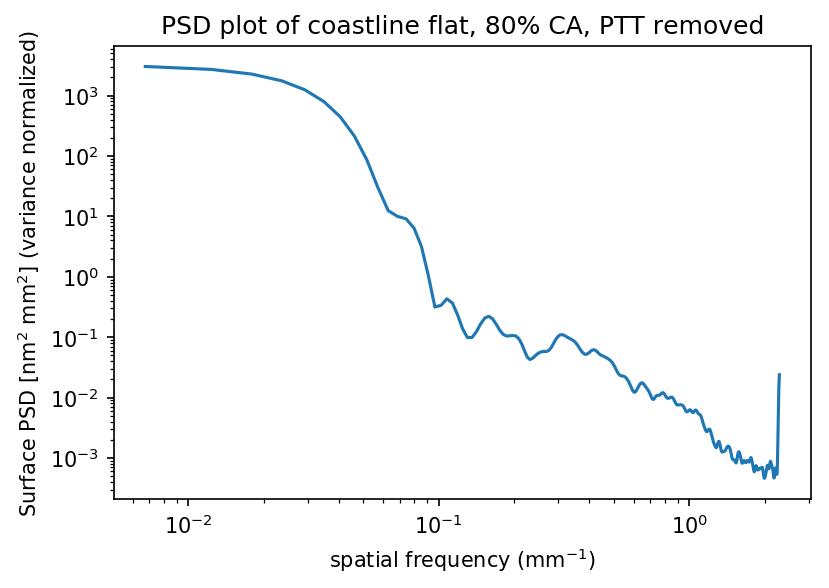

In [3]:
# convert mean from mm^2 mm^2 to nm^2 mm^2
n_surf = 0
#mean_val_nm2 = [i*1e12 for i in mean_psd_arr[0,:]]
plt.figure(dpi=150)
plt.loglog(kval_cf[n_surf,:], [i*1e12 for i in mean_psd_cf[n_surf,:]])
plt.title('PSD plot of coastline flat, 80% CA, PTT removed')
plt.xlabel('spatial frequency (mm$^{-1}$)')
plt.ylabel('Surface PSD [nm$^{2}$ mm$^{2}$] (variance normalized)') 

In [5]:
# 1 inch flats (8 total)

ca_val = 80
dr_width = 5

ntot_1 = 8 # goes from 1-8
D_full_1 = 25.4*u.mm
npix_diam_1 = []
var_1 = []

print('Crunching PSDs for 1 inch flats (8 total mirrors)')

for ntest in range(0,ntot_1):
    # open the optic surface
    surf_loc = 'zygo_data/flat_mirrors/median_combined/1in_n{}_mediansurface.fits'.format(ntest+1)
    
    # pass in the data for generating PSD content
    (kval, mean_val, npix_diam, ap_var) = psd.calc_PSD(surf_loc, D_full_1, ca_val, dr_width)
    
    print('Finished calculating PSD for surface {}'.format(ntest))
    # if this is the first loop, initialize variables.
    # There's gotta be a smarter way to do this.
    if ntest == 0:
        kval_1 = np.zeros((ntot_1, np.shape(kval)[0]))
        mean_psd_1 = np.zeros((ntot_1, np.shape(mean_val)[0]))
    
    kval_1[ntest,:] = copy.copy(kval)
    mean_psd_1[ntest,:] = copy.copy(mean_val)
    npix_diam_1.append(npix_diam)
    var_1.append(ap_var)

Crunching PSDs for 1 inch flats (8 total mirrors)
Finished calculating PSD for surface 0
Finished calculating PSD for surface 1
Finished calculating PSD for surface 2
Finished calculating PSD for surface 3
Finished calculating PSD for surface 4
Finished calculating PSD for surface 5
Finished calculating PSD for surface 6
Finished calculating PSD for surface 7


In [11]:
# 2 inch flats (8 total)

ca_val = 80
dr_width = 5

ntot_2 = 8 # goes from 1-8
D_full_2 = 50.8*u.mm
npix_diam_2 = []
var_2 = []

print('Crunching PSDs for 2 inch flats ({} total mirrors)'.format(ntot_2))

for ntest in range(0,ntot_2):
    # open the optic surface
    surf_loc = 'zygo_data/flat_mirrors/median_combined/2in_n{}_mediansurface.fits'.format(ntest+1)
    
    # pass in the data for generating PSD content
    (kval, mean_val, npix_diam, ap_var) = psd.calc_PSD(surf_loc, D_full_2, ca_val, dr_width)
    
    #print('Finished calculating PSD for surface {}'.format(ntest))
    # if this is the first loop, initialize variables.
    # There's gotta be a smarter way to do this.
    if ntest == 0:
        kval_2 = np.zeros((ntot_2, np.shape(kval)[0]))
        mean_psd_2 = np.zeros((ntot_2, np.shape(mean_psd_arr)[0]))
    
    kval_2[ntest,:] = copy.copy(kval)
    mean_psd_2[ntest,:] = copy.copy(mean_val)
    npix_diam_2.append(npix_diam)
    var_2.append(ap_var)

Crunching PSDs for 2 inch flats (8 total mirrors)


ValueError: operands could not be broadcast together with shapes (563,563) (564,564) 

In [12]:
# 19mm flats (2 total)

ca_val = 80
dr_width = 5

ntot_19 = 2 # goes from 1-2
D_full_19 = 19*u.mm
npix_diam_19 = []
var_19 = []

print('Crunching PSDs for 19mm flats ({} total mirrors)'.format(ntot_19))

for ntest in range(0,ntot_19):
    # open the optic surface
    surf_loc = 'zygo_data/flat_mirrors/median_combined/19mm_n{}_mediansurface.fits'.format(ntest+1)
    
    # pass in the data for generating PSD content
    (kval, mean_val, npix_diam, ap_var) = psd.calc_PSD(surf_loc, D_full_19, ca_val, dr_width)
    
    #print('Finished calculating PSD for surface {}'.format(ntest))
    # if this is the first loop, initialize variables.
    # There's gotta be a smarter way to do this.
    if ntest == 0:
        kval_19 = np.zeros((ntot_19, np.shape(kval)[0]))
        mean_psd_19 = np.zeros((ntot_19, np.shape(mean_psd_arr)[0]))
    
    kval_19[ntest,:] = copy.copy(kval)
    mean_psd_19[ntest,:] = copy.copy(mean_val)
    npix_diam_19.append(npix_diam)
    var_19.append(ap_var)

Crunching PSDs for 19mm flats (2 total mirrors)


ValueError: operands could not be broadcast together with shapes (211,211) (212,212) 

In [14]:
# 0.5 inch flats (1 total)

ca_val = 80
dr_width = 5

ntot_05 = 1 # goes from 1
D_full_05 = 12.7*u.mm
npix_diam_05 = []
var_05 = []

print('Crunching PSDs for 0.5 inch flats ({} total mirrors)'.format(ntot_05))

for ntest in range(0,ntot_05):
    # open the optic surface
    surf_loc = 'zygo_data/flat_mirrors/median_combined/0p5in_n{}_mediansurface.fits'.format(ntest+1)
    
    # pass in the data for generating PSD content
    (kval, mean_val, npix_diam, ap_var) = psd.calc_PSD(surf_loc, D_full_05, ca_val, dr_width)
    
    #print('Finished calculating PSD for surface {}'.format(ntest))
    # if this is the first loop, initialize variables.
    # There's gotta be a smarter way to do this.
    if ntest == 0:
        kval_05 = np.zeros((ntot_05, np.shape(kval)[0]))
        mean_psd_05 = np.zeros((ntot_05, np.shape(mean_val)[0]))
    
    kval_05[ntest,:] = copy.copy(kval)
    mean_psd_05[ntest,:] = copy.copy(mean_val)
    npix_diam_05.append(npix_diam)
    var_05.append(ap_var)

Crunching PSDs for 0.5 inch flats (1 total mirrors)


In [18]:
np.sqrt(var_1)*1e6 # converts mm to nm

array([3.05506604, 2.99531994, 3.35463839, 2.57971887, 2.61543681,
       3.13167159, 2.15205112, 2.93925124])

## Build the PSD plots

Text(0, 0.5, 'Surface PSD [nm$^{2}$ mm$^{2}$] (variance normalized)')

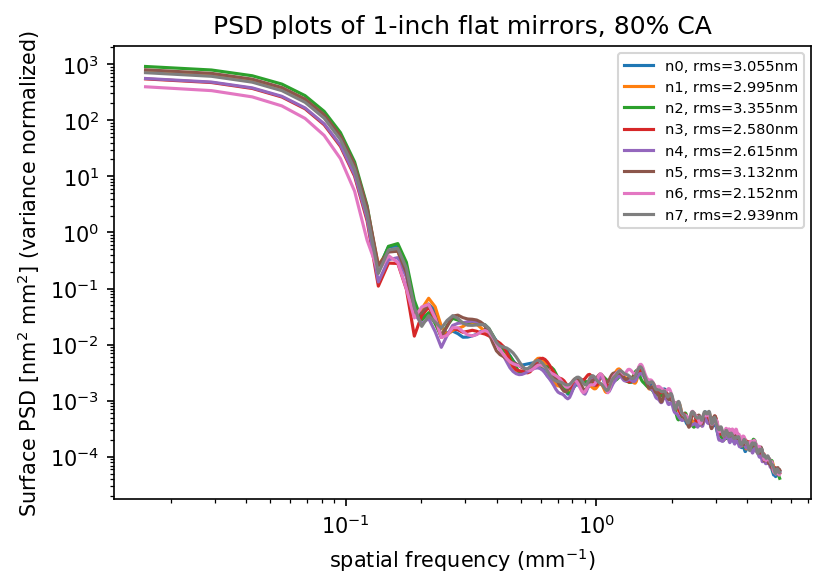

In [24]:
# convert mean from mm^2 mm^2 to nm^2 mm^2
#mean_val_nm2 = [i*1e12 for i in mean_psd_arr[0,:]]
rms_1 = np.sqrt(var_1)*1e6 # converts mm to nm
plt.figure(dpi=150)
for ns in range(0,ntot_1):
    plt.loglog(kval_1[ns,:], [i*1e12 for i in mean_psd_1[ns,:]], label='n{}, rms={:.3f}nm'.format(ns, rms_1[ns]))
plt.title('PSD plots of 1-inch flat mirrors, 80% CA')
plt.legend(prop={'size':7})
plt.xlabel('spatial frequency (mm$^{-1}$)')
plt.ylabel('Surface PSD [nm$^{2}$ mm$^{2}$] (variance normalized)') 

Text(0, 0.5, 'Surface PSD [nm$^{2}$ mm$^{2}$] (variance normalized)')

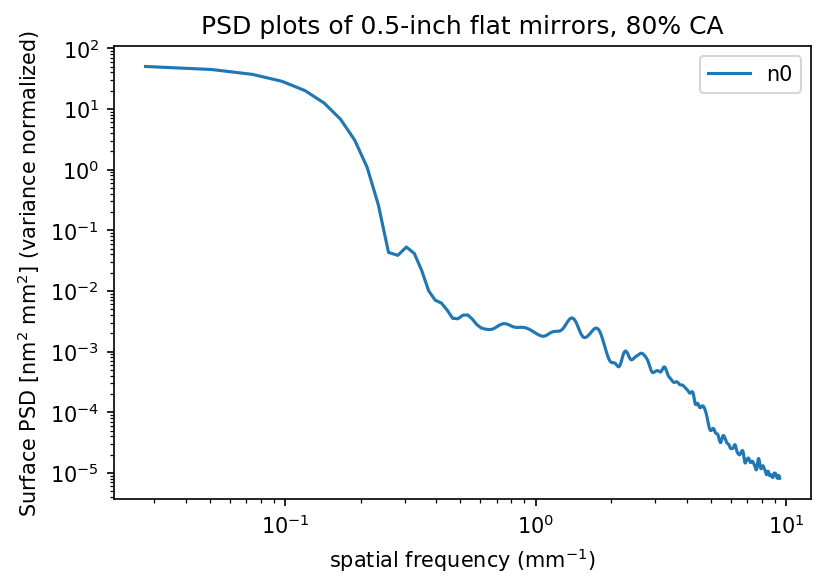

In [15]:
# convert mean from mm^2 mm^2 to nm^2 mm^2
#mean_val_nm2 = [i*1e12 for i in mean_psd_arr[0,:]]
plt.figure(dpi=150)
for ns in range(0,ntot_05):
    plt.loglog(kval_05[ns,:], [i*1e12 for i in mean_psd_05[ns,:]], label='n{}'.format(ns))
plt.title('PSD plots of 0.5-inch flat mirrors, 80% CA')
plt.legend()
plt.xlabel('spatial frequency (mm$^{-1}$)')
plt.ylabel('Surface PSD [nm$^{2}$ mm$^{2}$] (variance normalized)') 

Text(0, 0.5, 'Surface PSD [nm$^{2}$ mm$^{2}$] (variance normalized)')

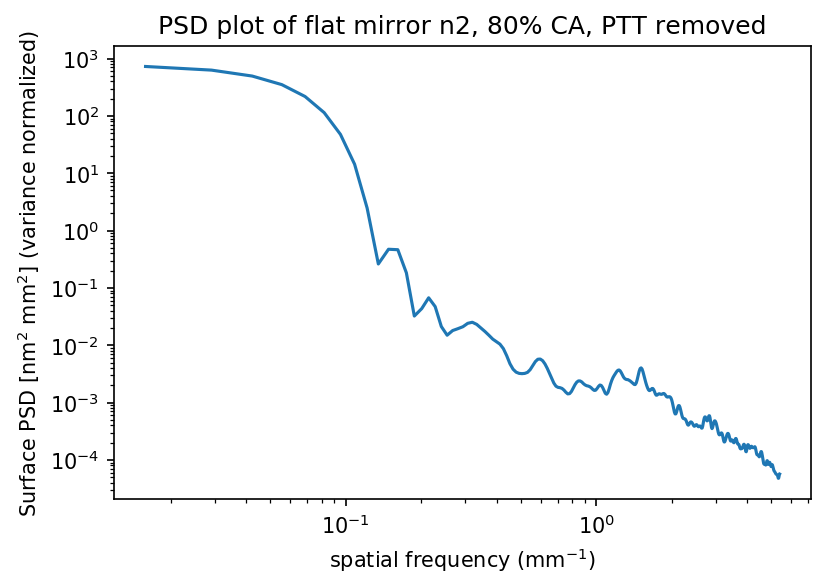

In [6]:
# convert mean from mm^2 mm^2 to nm^2 mm^2
n_surf = 1
#mean_val_nm2 = [i*1e12 for i in mean_psd_arr[0,:]]
plt.figure(dpi=150)
plt.loglog(kval_1in[n_surf,:], [i*1e12 for i in mean_psd_1in[n_surf,:]])
plt.title('PSD plot of flat mirror n{}, 80% CA, PTT removed'.format(n_surf+1))
plt.xlabel('spatial frequency (mm$^{-1}$)')
plt.ylabel('Surface PSD [nm$^{2}$ mm$^{2}$] (variance normalized)') 

## Investigating shapes of arrays
All content here is notes and nothing useful, maybe.

In [26]:
ntot_1in = 8 # goes from 1-8
data_shape_arr = []
new_optic_arr = []
for ntest in range(0,ntot_1in):
    # open the optic surface
    surf_loc = 'zygo_data/flat_mirrors/median_combined/1in_n{}_mediansurface.fits'.format(ntest+1)
    optic, optic_header = fits.getdata(surf_loc, header=True)
    
    # if the optics are not the same shape, cut down the edges of where there would be extra zeros.
    if np.shape(optic)[0] < np.shape(optic)[1]:
        diff = np.int(np.abs(np.shape(optic)[0] - np.shape(optic)[1]))
        new_optic = optic[:,np.int(diff/2):np.shape(optic)[1]-np.int(diff/2)]
    elif np.shape(optic)[0] > np.shape(optic)[1]:
        diff = np.int(np.abs(np.shape(optic)[0] - np.shape(optic)[1]))
        new_optic = optic[np.int(diff/2):np.shape(optic)[0]-np.int(diff/2),:]
    else:
        new_optic=optic
    
    new_optic_arr.append(np.shape(new_optic))


In [27]:
data_shape_arr

[(276, 276),
 (276, 280),
 (276, 280),
 (276, 276),
 (276, 280),
 (276, 280),
 (280, 276),
 (280, 276)]

In [28]:
new_optic_arr

[(276, 276),
 (276, 276),
 (276, 276),
 (276, 276),
 (276, 276),
 (276, 276),
 (276, 276),
 (276, 276)]

In [24]:
surf_loc = 'zygo_data/flat_mirrors/median_combined/1in_n2_mediansurface.fits'.format(ntest+1)
optic, optic_header = fits.getdata(surf_loc, header=True)
np.shape(optic)

(276, 280)

In [25]:
if np.shape(optic)[0] < np.shape(optic)[1]:
    diff = np.int(np.abs(np.shape(optic)[0] - np.shape(optic)[1]))
    new_optic = optic[:,np.int(diff/2):np.shape(optic)[1]-np.int(diff/2)]
elif np.shape(optic)[0] > np.shape(optic)[1]:
    diff = np.int(np.abs(np.shape(optic)[0] - np.shape(optic)[1]))
    new_optic = optic[np.int(diff/2):np.shape(optic)[0]-np.int(diff/2),:]
else:
    new_optic=optic
np.shape(new_optic)

(276, 276)

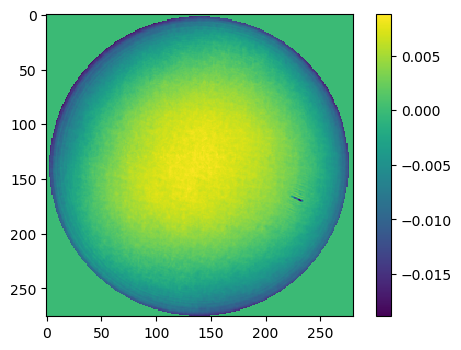

In [18]:
plt.figure(dpi=100)
plt.imshow(optic)
plt.colorbar()

In [19]:
optic_data = psd.zeroPadSquare(optic)
np.shape(optic_data)

(280, 280)

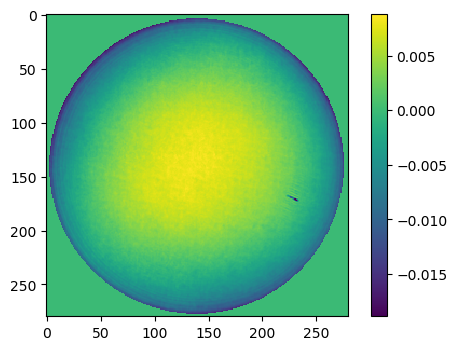

In [20]:
plt.figure(dpi=100)minimum
plt.imshow(optic_data)
plt.colorbar()

In [5]:
ntot_2in = 8 # goes from 1-8
data_shape_arr_2in = []
for ntest in range(0,ntot_2in):
    # open the optic surface
    surf_loc = 'zygo_data/flat_mirrors/median_combined/2in_n{}_mediansurface.fits'.format(ntest+1)
    optic, optic_header = fits.getdata(surf_loc, header=True)
    data_shape_arr_2in.append(np.shape(optic))
data_shape_arr_2in

[(564, 564),
 (564, 564),
 (564, 564),
 (564, 564),
 (564, 564),
 (564, 564),
 (564, 564),
 (564, 564)]

In [6]:
ntot_19mm = 2 # goes from 1-8
data_shape_arr_19mm = []
for ntest in range(0,ntot_19mm):
    # open the optic surface
    surf_loc = 'zygo_data/flat_mirrors/median_combined/19mm_n{}_mediansurface.fits'.format(ntest+1)
    optic, optic_header = fits.getdata(surf_loc, header=True)
    data_shape_arr_19mm.append(np.shape(optic))
data_shape_arr_19mm

[(212, 212), (212, 212)]

In [7]:
surf_loc = 'zygo_data/flat_mirrors/median_combined/0p5in_n1_mediansurface.fits'
optic, optic_header = fits.getdata(surf_loc, header=True)
np.shape(optic)

(240, 244)